In [16]:
# alex exception
import pandas as pd

file = "../memory_exception/memory_exception/fb-1/42/0.5/alex_insert_memory_exception.log"

df = pd.read_csv(file)
print(len(df))
print(len(df[df['num_keys'] != 0]))

# add column idx
df['idx'] = df.index
print(df['num_keys'].sum())


134610148
392423
200000000


1347
      num_keys        idx
0           12      99999
264          1   26499999
529          1   52999999
793          1   79399999
1057         1  105799999
1322         1  132299999
1342  53037676  134299999
1343  58156582  134399999
1344  46353283  134499999
1345  39024870  134599999
1346   3427572  134610147
200000000


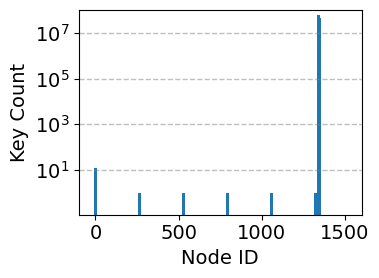

In [17]:
# alex fb worst 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(4, 3))

def merge(df):
    # mask = (df['num_keys']!= 0) | (df['num_keys']!= df['num_keys'].shift(1))
    # merged_df = df[mask]

    # merge df every 10000 rows
    merged_df = df.groupby(df.index // 100000).agg({
        'num_keys': 'sum',
        'idx': 'last'
    })
    
    return merged_df

merged_df = merge(df)
print(len(merged_df))
print(merged_df[merged_df['num_keys'] != 0].to_string())
print(merged_df['num_keys'].sum())

# for each row in the dataframe
for index, row in merged_df.iterrows():
    ax.bar(index, row['num_keys'], width=20, color='#1f77b4')

ax.set_xlabel('Node ID')
ax.set_ylabel('Key Count')
ax.set_yscale('log')
ax.set_xlim(-100, 1600)
ax.set_ylim(0.11, 1e8)
# ax.set_yticks([1, 100, 1e4, 1e6, 1e8])
# ax.set_yticklabels(['1', '10^2', '10k', '1M', '100M'])

plt.gca().yaxis.grid(which='major', linestyle='--', linewidth=1, color='gray', alpha=0.5)
plt.tight_layout()
plt.show()
fig.savefig('./fig/alex_memory_1.pdf', bbox_inches='tight', transparent=True)

134217725
55
392368


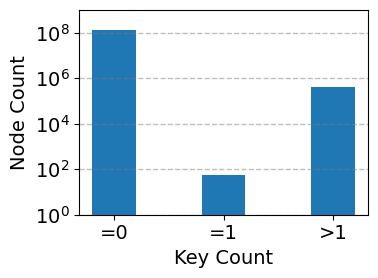

In [19]:
# alex fb worst 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(4, 3))

# print(len(df))
print(len(df[df['num_keys'] == 0]))
print(len(df[df['num_keys'] == 1]))
print(len(df[df['num_keys'] > 1]))

ax.bar(0, len(df[df['num_keys'] == 0]), color='#1f77b4', width=0.4)
ax.bar(1, len(df[df['num_keys'] == 1]), color='#1f77b4', width=0.4)
ax.bar(2, len(df[df['num_keys'] > 1]), color='#1f77b4', width=0.4)

ax.set_xlabel('Key Count')
ax.set_ylabel('Node Count')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['=0', '=1', '>1'])
ax.set_yscale('log')
ax.set_ylim(1, 1e9)

plt.gca().yaxis.grid(which='major', linestyle='--', linewidth=1, color='gray', alpha=0.5)
plt.tight_layout()
plt.show()
fig.savefig('./fig/alex_memory_2.pdf', bbox_inches='tight', transparent=True)

alex: meta=0.022723476111059175, empty_slot=0.29294255344051473, non_empty_slot=0.684333970448426, cc=0.0
alexolc: meta=0.023270968294350304, empty_slot=0.29258628819887195, non_empty_slot=0.6835829566921198, cc=0.0005597868146580177
alexworst: meta=0.7874442061467006, empty_slot=0.09686539630534825, non_empty_slot=0.11569039754795112, cc=0.0
lipp: meta=0.1350864100381091, empty_slot=0.7144742007355455, non_empty_slot=0.1504393892263455, cc=0.0
sali: meta=0.15979862806135023, empty_slot=0.5149479783844636, non_empty_slot=0.10842723305388947, cc=0.2168261605002967


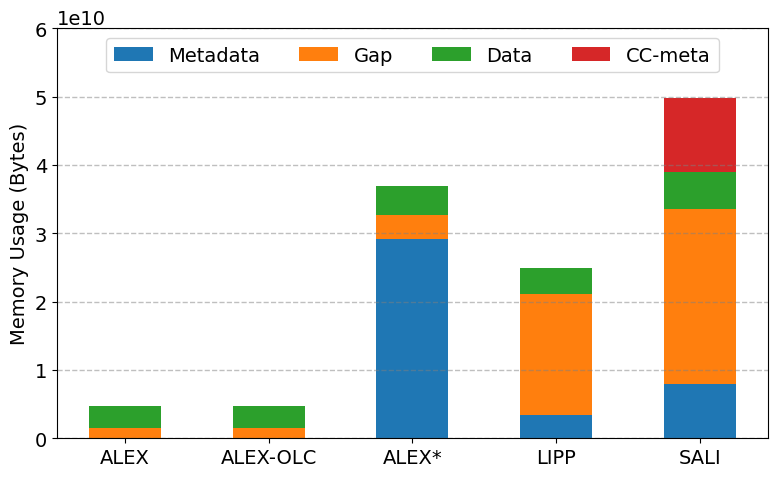

In [23]:
# memory breakdown fb worst case
import pandas as pd
import matplotlib.pyplot as plt

# alex:     42      100M        0.5
# lipp:     21      1M          0.005
# alexolc   21      2M          0.01
# sali      21      2M          0.01

index_types = ['alex', 'alexolc', 'alexworst', 'lipp', 'sali']
df_dict = {}

alex_file = "../memory_breakdown/memory_breakdown/fb-1/10/1.0/alex_insert_size_stats.log"
alex_worst_file = "../memory_breakdown/memory_breakdown/fb-1/42/0.5/alex_insert_size_stats.log"
lipp_file = "../memory_breakdown/memory_breakdown/fb-1/10/1.0/lipp_insert_size_stats.log"
alexolc_file = "../memory_breakdown_multi/memory_breakdown/fb-1/10/1.0/alexolc_insert_size_stats.log"
sali_file = "../memory_breakdown_multi/memory_breakdown/fb-1/10/1.0/sali_insert_size_stats.log"
alex_df = pd.read_csv(alex_file)
alex_worst_df = pd.read_csv(alex_worst_file)
lipp_df = pd.read_csv(lipp_file)
alexolc_df = pd.read_csv(alexolc_file)
sali_df = pd.read_csv(sali_file)

# data processing

# alex
inner_meta_size = alex_df.loc[alex_df['type'] == 'inner_meta_size', 'size'].values[0]
leaf_meta_size = alex_df.loc[alex_df['type'] == 'leaf_meta_size', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'meta', 'size': inner_meta_size + leaf_meta_size}])
alex_df = pd.concat([alex_df, new_row], ignore_index=True)

inner_dup_size = alex_df.loc[alex_df['type'] == 'inner_dup_size', 'size'].values[0]
leaf_gap_size = alex_df.loc[alex_df['type'] == 'leaf_gap_size', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'empty_slot', 'size': inner_dup_size + leaf_gap_size}])
alex_df = pd.concat([alex_df, new_row], ignore_index=True)

inner_ptr_size = alex_df.loc[alex_df['type'] == 'inner_ptr_size', 'size'].values[0]
leaf_slot_size = alex_df.loc[alex_df['type'] == 'leaf_slot_size', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'non_empty_slot', 'size': inner_ptr_size + leaf_slot_size}])
alex_df = pd.concat([alex_df, new_row], ignore_index=True)

df_dict['alex'] = alex_df

# alex_worst
inner_meta_size = alex_worst_df.loc[alex_worst_df['type'] == 'inner_meta_size', 'size'].values[0]
leaf_meta_size = alex_worst_df.loc[alex_worst_df['type'] == 'leaf_meta_size', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'meta', 'size': inner_meta_size + leaf_meta_size}])
alex_worst_df = pd.concat([alex_worst_df, new_row], ignore_index=True)

inner_dup_size = alex_worst_df.loc[alex_worst_df['type'] == 'inner_dup_size', 'size'].values[0]
leaf_gap_size = alex_worst_df.loc[alex_worst_df['type'] == 'leaf_gap_size', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'empty_slot', 'size': inner_dup_size + leaf_gap_size}])
alex_worst_df = pd.concat([alex_worst_df, new_row], ignore_index=True)

inner_ptr_size = alex_worst_df.loc[alex_worst_df['type'] == 'inner_ptr_size', 'size'].values[0]
leaf_slot_size = alex_worst_df.loc[alex_worst_df['type'] == 'leaf_slot_size', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'non_empty_slot', 'size': inner_ptr_size + leaf_slot_size}])
alex_worst_df = pd.concat([alex_worst_df, new_row], ignore_index=True)

df_dict['alexworst'] = alex_worst_df

# alexolc
inner_meta_size = alexolc_df.loc[alexolc_df['type'] == 'inner_meta_size', 'size'].values[0]
leaf_meta_size = alexolc_df.loc[alexolc_df['type'] == 'leaf_meta_size', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'meta', 'size': inner_meta_size + leaf_meta_size}])
alexolc_df = pd.concat([alexolc_df, new_row], ignore_index=True)

inner_cc_size = alexolc_df.loc[alexolc_df['type'] == 'inner_cc_size', 'size'].values[0]
leaf_cc_size = alexolc_df.loc[alexolc_df['type'] == 'leaf_cc_size', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'cc', 'size': inner_cc_size + leaf_cc_size}])
alexolc_df = pd.concat([alexolc_df, new_row], ignore_index=True)

inner_dup_size = alexolc_df.loc[alexolc_df['type'] == 'inner_dup_size', 'size'].values[0]
leaf_gap_size = alexolc_df.loc[alexolc_df['type'] == 'leaf_gap_size', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'empty_slot', 'size': inner_dup_size + leaf_gap_size}])
alexolc_df = pd.concat([alexolc_df, new_row], ignore_index=True)

inner_ptr_size = alexolc_df.loc[alexolc_df['type'] == 'inner_ptr_size', 'size'].values[0]
leaf_slot_size = alexolc_df.loc[alexolc_df['type'] == 'leaf_slot_size', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'non_empty_slot', 'size': inner_ptr_size + leaf_slot_size}])
alexolc_df = pd.concat([alexolc_df, new_row], ignore_index=True)

df_dict['alexolc'] = alexolc_df

# lipp
data_slot = lipp_df.loc[lipp_df['type'] == 'data_slot', 'size'].values[0]
node_slot = lipp_df.loc[lipp_df['type'] == 'node_slot', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'non_empty_slot', 'size': data_slot + node_slot}])
lipp_df = pd.concat([lipp_df, new_row], ignore_index=True)

df_dict['lipp'] = lipp_df

# sali
data_slot = sali_df.loc[sali_df['type'] == 'data_slot', 'size'].values[0]
node_slot = sali_df.loc[sali_df['type'] == 'node_slot', 'size'].values[0]
new_row = pd.DataFrame([{'type': 'non_empty_slot', 'size': data_slot + node_slot}])
sali_df = pd.concat([sali_df, new_row], ignore_index=True)

df_dict['sali'] = sali_df

# print(alex_df)
# print(alexolc_df)
# print(lipp_df)
# print(sali_df)

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(8, 5))

for idx, index_type in enumerate(index_types):
    df_index = df_dict[index_type]
    y1 = df_index.loc[df_index['type'] == 'meta', 'size'].values[0]
    y2 = df_index.loc[df_index['type'] == 'empty_slot', 'size'].values[0]
    y3 = df_index.loc[df_index['type'] == 'non_empty_slot', 'size'].values[0]
    ax.bar(idx, y1, color='#1f77b4', label='meta', width=0.5)
    ax.bar(idx, y2, bottom=y1, color='#ff7f0e', label='empty_slot', width=0.5)
    ax.bar(idx, y3, bottom=y1+y2, color='#2ca02c', label='non_empty_slot', width=0.5)
    if index_type == 'alexolc' or index_type == 'sali':
        y4 = df_index.loc[df_index['type'] == 'cc', 'size'].values[0]
    else:
        y4 = 0
    y_sum = y1 + y2 + y3 + y4
    print(f"{index_type}: meta={y1/y_sum}, empty_slot={y2/y_sum}, non_empty_slot={y3/y_sum}, cc={y4/y_sum}")
    ax.bar(idx, y4, bottom=y1+y2+y3, color='#d62728', label='cc', width=0.5)


# ax.set_xlabel('Index Type')
ax.set_ylabel('Memory Usage (Bytes)')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(['ALEX', 'ALEX-OLC', 'ALEX*', 'LIPP', 'SALI'])
ax.legend(['Metadata', 'Gap', 'Data', 'CC-meta'], loc='upper center', ncol=4)

ax.set_ylim(0, 6e10)

plt.gca().yaxis.grid(which='major', linestyle='--', linewidth=1, color='gray', alpha=0.5)
plt.tight_layout()
plt.show()
fig.savefig('./fig/memory_breakdown.pdf', bbox_inches='tight', transparent=True)
